## Clustering

In [157]:
import pandas as pd
import os
import matplotlib.pyplot as plt

df_prepared_pd_PK = pd.read_csv('df_prepared_pd_PK.csv')
df_prepared_pd = pd.read_csv('df_prepared_pd.csv')
components = pd.read_csv('components.csv', header=None, names=['x', 'y', 'z'])

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



print(len(components))
components.head()


1299


,x,y,z
0,-15.288968,5.571270,-5.089252
1,7.468919,-12.697281,1.373439
2,9.778111,4.275306,8.234096
3,9.672915,4.152413,7.983716
4,3.751263,19.812469,-1.312232


In [ ]:
components.tail()

,x,y,z
1294,0.264691,15.999910,3.335319
1295,6.482172,15.296995,9.935127
1296,-0.460395,5.672930,6.743094
1297,-4.017110,14.857420,4.278584
1298,7.177720,16.669668,8.899571


##### Primitive clustering

Typically, people who work most with DBSCAN take min point twice of the dimensionality of data i.e min Point≈2*d.

In [158]:
from sklearn.cluster import KMeans

In [159]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(components)
print(y_pred)

[3 2 4 ... 1 1 1]


In [160]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(components)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]


c:\Users\marlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



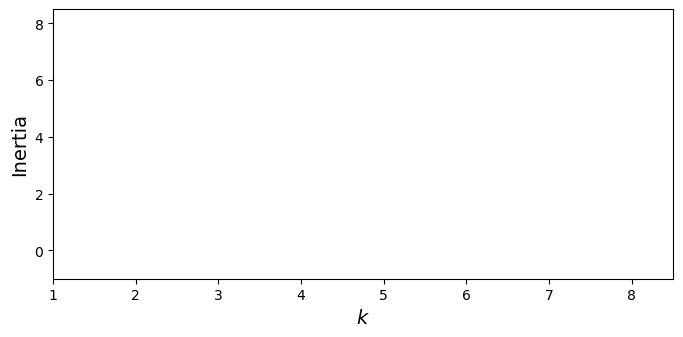

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, -1, 8.5])
# plt.axis([1, 8.5, 0, 20000])

plt.show()

##### Silhouette score

In [161]:
from sklearn.metrics import silhouette_score

In [162]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(components)
                for k in range(1, 20)]

silhouette_scores = [silhouette_score(components, model.labels_)
                     for model in kmeans_per_k[1:]]

n = 5
idx = sorted(range(len(silhouette_scores)), key=lambda i: silhouette_scores[i], reverse=True)[:n]

# Print values and their corresponding indexes
for i in idx:
    print("Clusters:", i+2, "/  Value:", silhouette_scores[i])



c:\Users\marlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



Clusters: 3 /  Value: 0.3984404608936461
Clusters: 2 /  Value: 0.3864989378863328
Clusters: 4 /  Value: 0.3562934824963969
Clusters: 13 /  Value: 0.33992853365447756
Clusters: 18 /  Value: 0.3390013884120276


Saving figure Silhouette score


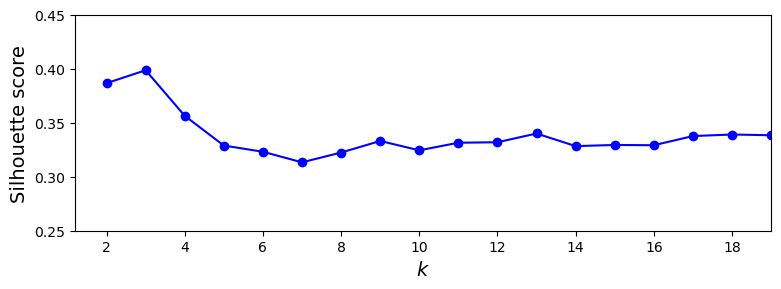

In [163]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.1, 0.25])
plt.axis([1.2, 19, 0.25, 0.45])

save_fig("Silhouette score")
plt.show()

##### Silhouette diagram

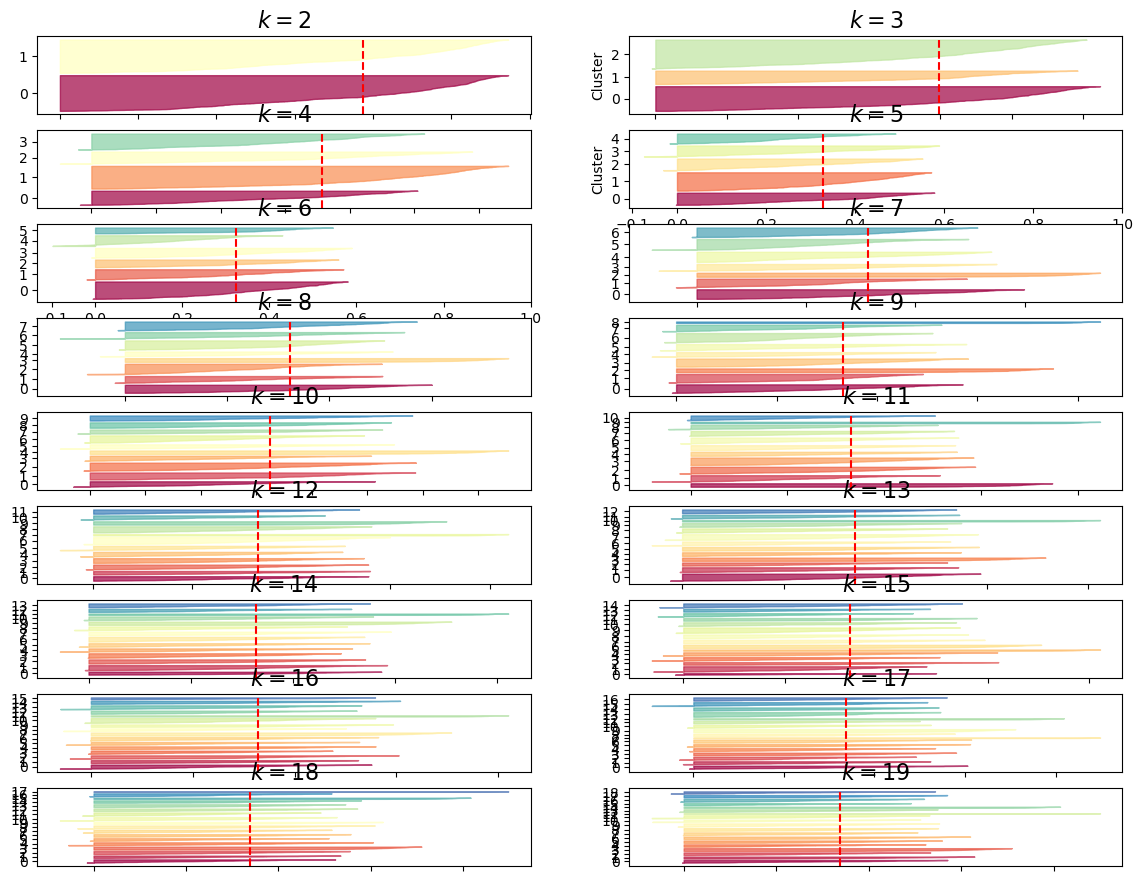

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np


plt.figure(figsize=(14, 12))

for k in (2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12, 13 ,14, 15 ,16, 17, 18, 19):
    plt.subplot(10, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(components, y_pred)

    padding = len(components) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()

## KMeans

In [ ]:
k = 13 #6
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(components)
print(y_pred)
print(len(y_pred))

[ 3  0  6 ...  1  1 12]
1299


In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE

# tsne = TSNE(n_components=3) #, verbose=1
# components = tsne.fit_transform(df_prepared_pd)
my_list = [2] * len(components)

fig = px.scatter_3d(
    components, x='x', y='y', z='z', 
    title='Interactive t-SNE Plot with tempo', color = y_pred, #df_prepared_pd["tempo"],
    opacity=0.7,
    # labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3',}
    size=my_list,
    symbol = y_pred
)

fig.update_layout(width=700, height=400,margin=dict(l=0, r=0, b=0, t=0))

## DBSCAN

## AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=13).fit(components)

print(np.unique(clustering.labels_))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
AgglomerativeClustering_per_k = [AgglomerativeClustering(n_clusters=k).fit(components)
                for k in range(1, 25)]
silhouette_scores = [silhouette_score(components, clustering.labels_)
                     for clustering in AgglomerativeClustering_per_k[1:]]

n = 5
idx = sorted(range(len(silhouette_scores)), key=lambda i: silhouette_scores[i], reverse=True)[:n]

# Print values and their corresponding indexes
for i in idx:
    print("Clusters:", i+2, "/  Value:", silhouette_scores[i])


Clusters: 3 /  Value: 0.3786310023390275
Clusters: 2 /  Value: 0.34676938305479044
Clusters: 24 /  Value: 0.31643979107974357
Clusters: 7 /  Value: 0.31610013308057794
Clusters: 6 /  Value: 0.31343019083228146


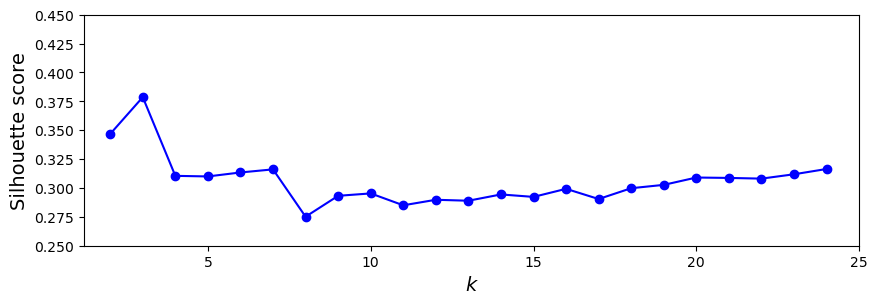

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(range(2, 25), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.1, 0.25])
plt.axis([1.2, 25, 0.25, 0.45])

plt.show()

In [164]:
fig = px.scatter_3d(
    components, x='x', y='y', z='z', 
    title='Cluster Plot', color = clustering.labels_, 
    opacity=0.7,
    # labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3',}
    size=my_list,
    symbol = df_prepared_pd_PK['PK']
)
fig.update_layout(width=1200, height=400,margin=dict(l=0, r=0, b=0, t=0))

In [1]:
import chart_studio.plotly as py

py.plot(fig, filename="Cluster Plot", auto_open = True)


NameError: name 'fig' is not defined